[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


<BarContainer object of 19 artists>

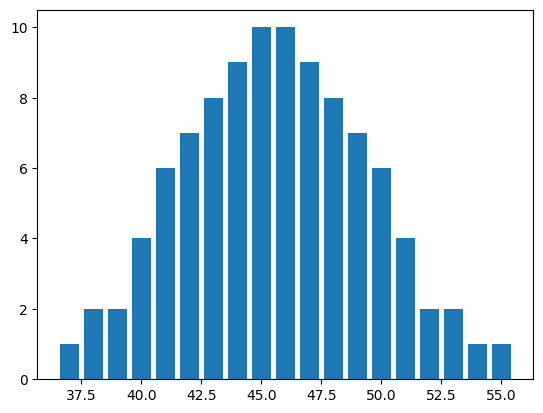

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# recuerda que este archivo lo puedes bajar de: https://seattlecentral.edu/qelp/sets/057/057.html
df = pd.read_excel('s057.xls')
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(arr, return_counts=True)
print(values)
plt.bar(values, dist)


---

# Comprobación numérica

Vamos ahora a hacer una comprobación numérica de que esos parámetros efectivamente ajustan de manera óptima los datos. Construye funciones en Python que te permitan calcular directamente los parámetros óptimos según las ecuaciones encontradas:


$$
\mu = \frac{1}{n} \sum_i^n x_i
$$

$$
\sigma^2 = \frac{1}{n}\sum_i^n (x_i-\mu)^2
$$

In [6]:
#Vamos a encontrar los valores óptimos de media y desviación estándar que se ajusten mejor a este tipo de distribución

def optimal_mu(arr=arr): #Creamos la función y le pasamos el parámetro, que en este caso es el array donde están los datos
    mu = 0 #Creamos la variable mu, con valor 0
    for i in arr: #Por cada número en el array
        mu += i #Sumamos ese número a mu
    return mu/len(arr) #Devolvemos el valor de mu entre el número de datos, lo cual es la media

def optimal_sigma(arr=arr): #Definimos la función y le pasamos el array como parámetro
    sigma = 0 #Creamos la variable de sigma y le asignamos 0 al principio
    mu = optimal_mu(arr) #Obtenemos el valor de mu (media) gracias a la función que hemos creado antes, y le pasamos el parámetro array
    for i in arr: #Por cada número en el array hacemos:
        sigma += (i-mu)**2 #Le sumamos a sigma (puesto que la ecuación es la sumatoria)
    return (sigma/len(arr))**0,5 #Devolvemos sigma entre la longitud de los datos y a eso le hacemos la ráiz cuadrada, y obtenemos la desviación estándar



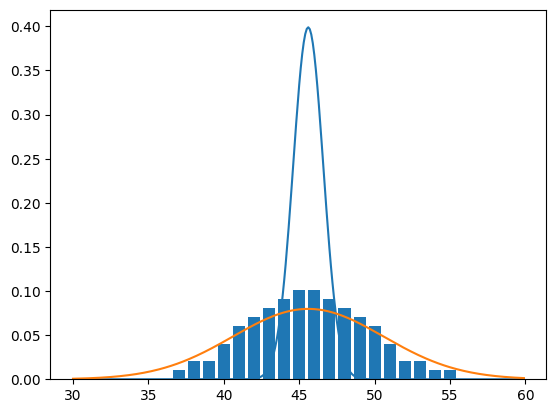

In [11]:
#Vamos a representarlo gráficamente para ver que son los valores que coinciden perfectamente y se ajustan a los datos

from scipy.stats import norm #importamos la función de norm, para poder operar más rápidamente

values, dist = np.unique(arr, return_counts=True) #Vamos a obtener los valores de array y su frecuencia
plt.bar(values, dist/len(arr)) #Vamos a representarlos gráficamente con un diagrama de barras

dist2 = norm(optimal_mu(), optimal_sigma()) #Vamos a crear una segunda distribución con los valores óptimos obtenidos de los datos
x = np.arange(30,60, 0.1) #Creamos un array que va de 30 a 60 con saltos de 0.1, que serán nuestros valores de x
y = [dist2.pdf(value) for value in x] #Obtenemos los valores de y, iterando por todos los valores de x y pasando la función de obtener la densidad probabilistica de la distribución creada anteriormente con los valores óptimos de los primeros datos
plt.plot(x,y)


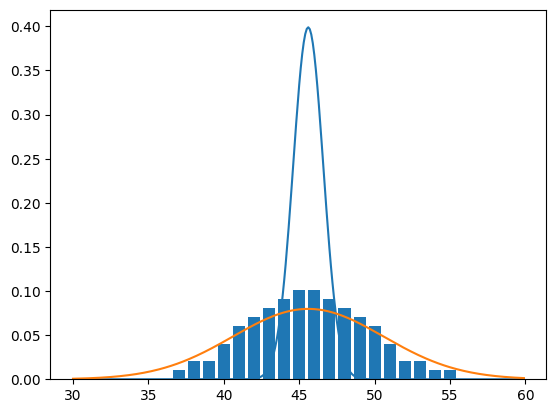

In [12]:
from scipy.stats import norm

values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))

dist = norm(optimal_mu(), optimal_sigma())
x = np.arange(30, 60, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)